In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import requests
from bs4 import BeautifulSoup

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import nltk.sentiment

from wordcloud import WordCloud
pd.set_option('display.max_colwidth', -1)
import re
from time import strftime

import unicodedata
import json
from pprint import pprint

# Turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

from PIL import Image

import acquire 
import prepare

In [ ]:
#acquire.scrape_github_data()

In [ ]:
#df = pd.DataFrame(acquire.scrape_github_data(), columns= ['repo', 'language', 'readme_contents'])
#df.head(10)

In [82]:
df = pd.read_csv('NLP.csv')
df.head()

Unnamed: 0                          repo    language  \
0  0           python-discord/bot            Python       
1  4           microsoft/BotBuilder-Samples  JavaScript   
2  5           GAwesomeBot/bot               JavaScript   
3  6           roughike/BottomBar            Java         
4  7           mithun-prasad/Bot             C#           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
### working on word clouds

In [3]:
df.head()

Unnamed: 0                          repo    language  \
0  0           python-discord/bot            Python       
1  4           microsoft/BotBuilder-Samples  JavaScript   
2  5           GAwesomeBot/bot               JavaScript   
3  6           roughike/BottomBar            Java         
4  7           mithun-prasad/Bot             C#           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [83]:
df = df.reset_index().drop(columns = 'index')

In [84]:
df.head()

Unnamed: 0                          repo    language  \
0  0           python-discord/bot            Python       
1  4           microsoft/BotBuilder-Samples  JavaScript   
2  5           GAwesomeBot/bot               JavaScript   
3  6           roughike/BottomBar            Java         
4  7           mithun-prasad/Bot             C#           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [85]:
df.lemmatized.value_counts()

p aligncent img altviewcount srchttpsviewswhatilearenedtodayviewsgithubmshawonyoutubeviewersvg img alto srchttpsimgshieldsiobadgeoswindows2020linux macsuccess hrefhttpsgithubcommshawonyoutubeviewerreleasesimg altdownload srchttpsimgshieldsiogithubdownloadsmshawonyoutubeviewertotallabeldownloadscolorsuccessa hrefhttpsgithubcommshawonyoutubeviewerissuesqis3aissueis3aclosedimg altclos issu srchttpsimgshieldsiogithubissuesclosedmshawonyoutubeviewersvga hrefhttpsgithubcommshawonyoutubeviewerissuesqis3aissueis3aopenimg altopen issu srchttpsimgshieldsiogithubissuesmshawonyoutubeviewera p p aligncent hrefhttpsgithubcommshawonyoutubeviewerreleaseslatestimg altgithub releas latest date srchttpsimgshieldsiogithubvreleasemshawonyoutubeviewercolorsuccessa hrefhttpsgithubcommshawonyoutubeviewerreleaseslatestimg altgithub releas date srchttpsimgshieldsiogithubreleasedatemshawonyoutubeviewercolorsuccessa p yb dp dpyb 88 88 888888 88 88 88yb 888888 ybdp dp yb 88 88 88 88 88 88__dp 88__ 8p yb dp y8 8p 8

In [86]:
train, validate, test = prepare.split_data(df)
print ('train ===>', train.shape)
print ('validate ===>', validate.shape)
print('test===>', test.shape)

train ===> (127, 7)
validate ===> (55, 7)
test===> (46, 7)


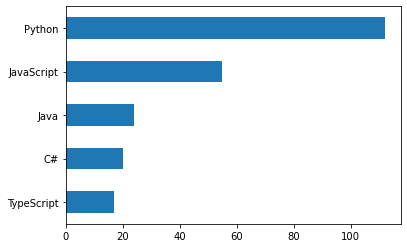

In [87]:
#bar on total dataset
df.language.value_counts().sort_values(ascending = True).plot.barh();


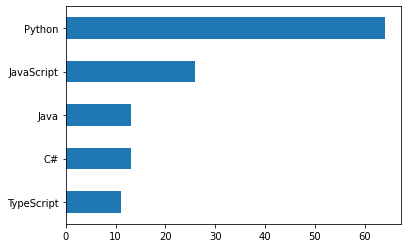

In [88]:
#bar on train dataset

train.language.value_counts().sort_values(ascending = True).plot.barh();

In [89]:
df.columns

Index(['Unnamed: 0', 'repo', 'language', 'readme_contents', 'clean', 'stemmed',
       'lemmatized'],
      dtype='object')

In [90]:
#creating word list:

train.dtypes

Unnamed: 0         int64 
repo               object
language           object
readme_contents    object
clean              object
stemmed            object
lemmatized         object
dtype: object

In [91]:
train.language.value_counts()

Python        64
JavaScript    26
C#            13
Java          13
TypeScript    11
Name: language, dtype: int64

In [ ]:
# def get_word_counts_series(df, column):
#     '''
#     This function takes in a dataframe
#     and the column you want to create the word counts of
#     returns a series of the words and their counts
#     You can get the top 20 or whatever from that later
#     '''
#     words = ' '.join(df[column])
    
#     words_list = words.split()
    
#     word_counts = pd.Series(words_list).value_counts()
    
#     return word_counts

In [92]:
train.columns

Index(['Unnamed: 0', 'repo', 'language', 'readme_contents', 'clean', 'stemmed',
       'lemmatized'],
      dtype='object')

In [93]:
list(train.language.unique())


['JavaScript', 'Python', 'TypeScript', 'C#', 'Java']

In [128]:
# combining the text strings for each language

# creating dfs
df_python = train[train.language == 'Python']
df_js = train[train.language == 'JavaScript']
df_java = train[train.language == 'Java']
df_c = train[train.language == 'C#']
df_type = train[train.language == 'TypeScript']
#all_words = train[train.language]

In [444]:
# generating text strings for each df
python_words = ' '.join(df_python.lemmatized.astype(str))
js_words = ' '.join(df_js.lemmatized.astype(str))
java_words = ' '.join(df_java.lemmatized.astype(str))
c_words = ' '.join(df_c.lemmatized.astype(str))
type_words = ' '.join(df_type.lemmatized.astype(str))
#all_words = ' '.join(all_words.lemmatized.astype(str))

In [445]:
# creating a df for the word count and frequency
# word count
df_python_count = pd.DataFrame(pd.Series(python_words.split()).value_counts(), columns = ['word_cnt']).head(20)
df_js_count = pd.DataFrame(pd.Series(js_words.split()).value_counts(), columns = ['word_cnt']).head(20)
df_java_count = pd.DataFrame(pd.Series(java_words.split()).value_counts(), columns = ['word_cnt']).head(20)
df_c_count = pd.DataFrame(pd.Series(c_words.split()).value_counts(), columns = ['word_cnt']).head(20)
df_type_count = pd.DataFrame(pd.Series(type_words.split()).value_counts(), columns = ['word_cnt']).head(20)


# word frequency
df_python_count['word_freq'] = pd.Series(python_words.split()).value_counts(normalize = True)
df_js_count['word_freq'] = pd.Series(js_words.split()).value_counts(normalize = True)
df_java_count['word_freq'] = pd.Series(java_words.split()).value_counts(normalize = True)
df_c_count['word_freq'] = pd.Series(c_words.split()).value_counts(normalize = True)
df_type_count['word_freq'] = pd.Series(type_words.split()).value_counts(normalize = True)

# df view
df_python_count

,word_cnt,word_freq
bot,418,0.018825
use,341,0.015358
instal,264,0.011890
python,248,0.011169
file,213,0.009593
run,159,0.007161
support,139,0.006260
account,130,0.005855
option,117,0.005269
user,117,0.005269


In [347]:
word_counts = pd.concat([df_python_count, df_js_count, df_java_count, java_words, df_c_count, df_type_count], axis=1).fillna(0).astype(int)
#word_counts.columns = [['python_word_cnt', 'python_word_freq','javascript_words', 'java_words', 'c_words','typescript_words']]
word_counts.head(20)

,word_cnt,word_freq,word_cnt,word_freq,word_cnt,word_freq,0,word_cnt,word_freq,word_cnt,word_freq
bot,418,0,226,0,0,0,20,144,0,78,0
use,341,0,146,0,93,0,93,82,0,38,0
instal,264,0,42,0,24,0,24,0,0,35,0
python,248,0,0,0,0,0,1,0,0,0,0
file,213,0,0,0,0,0,20,0,0,0,0
run,159,0,0,0,0,0,10,0,0,42,0
support,139,0,0,0,0,0,23,35,0,0,0
account,130,0,0,0,0,0,8,0,0,0,0
option,117,0,0,0,0,0,14,0,0,0,0
user,117,0,46,0,0,0,10,26,0,0,0


In [113]:
# # creating a df for the word count and frequency
# # word count
# df_js_count = pd.DataFrame(pd.Series(js_words.split()).value_counts(), columns = ['word_cnt']).head(20)

# # word frequency
# df_js_count['word_freq'] = pd.Series(js_words.split()).value_counts(normalize = True)

# # df view
# df_js_count

,word_cnt,word_freq
bot,226,0.023925
use,146,0.015456
chat,98,0.010375
web,90,0.009528
set,75,0.007940
messag,69,0.007305
heroku,66,0.006987
app,60,0.006352
api,51,0.005399
creat,48,0.005082


In [ ]:
####

In [460]:
#creating word strings
#all_words = ''.join(str(train.lemmatized))
python_words = ''.join(str(train[train.language == 'Python'].lemmatized))
javascript_words = ''.join(str(train[train.language == 'JavaScript'].lemmatized))
c_words = ''.join(str(train[train.language == 'C#'].lemmatized))
java_words = ''.join(str(train[train.language == 'Java'].lemmatized))
typescript_words = ''.join(str(train[train.language == 'TypeScript'].lemmatized))

In [461]:
### frequencies
#all_words = pd.Series(all_words.split()).value_counts()

python_words = pd.Series(python_words.split()).value_counts()
javascript_words = pd.Series(javascript_words.split()).value_counts()
c_words = pd.Series(c_words.split()).value_counts()
java_words = pd.Series(java_words.split()).value_counts()
typescript_words = pd.Series(typescript_words.split()).value_counts()


In [462]:
word_counts = pd.concat([python_words, javascript_words, c_words, java_words, typescript_words], axis=1).fillna(0).astype(int)
word_counts.columns = ['python_words', 'javascript_words', 'c_words', 'java_words', 'typescript_words']
word_counts['all_words'] = word_counts.sum(axis=1)
word_counts.head(20)

,python_words,javascript_words,c_words,java_words,typescript_words,all_words
bot,100,226,144,20,78,568
use,54,146,82,93,38,413
instal,50,42,14,24,35,165
user,42,46,26,10,5,129
file,32,30,9,20,6,97
telegram,28,3,1,3,0,35
get,27,38,18,13,14,110
python,26,7,0,1,0,34
code,24,45,21,9,15,114
command,24,18,5,0,18,65


In [ ]:
# sequence item 105: expected str instance, float found


In [136]:
all_words.head(20)

bot         98
use         42
instal      38
build       30
botbuild    29
get         26
user        25
snap        22
azur        21
command     21
file        20
test        20
sdk         19
run         19
code        19
support     18
pip         17
default     16
sourc       16
set         15
dtype: int64

In [194]:
# ## this should look good after I figure out letter issue

# word_counts = pd.concat([python_words, javascript_words, c_words, java_words, typescript_words, all_words], axis=1).fillna(0).astype(int)
# word_counts.columns = ['python_words', 'javascript_words', 'c_words', 'java_words', 'typescript_words', 'all_words']
# word_counts.head()

In [373]:
python_words = python_words.astype(object)
python_words

bot         100
use         54 
instal      50 
user        42 
file        32 
            .. 
cannot      1  
guarante    1  
older       1  
markdown    1  
object      1  
Length: 1173, dtype: object

<Figure size 1800x864 with 0 Axes>

<Figure size 1800x864 with 0 Axes>

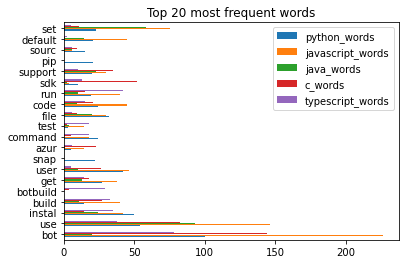

<Figure size 1800x864 with 0 Axes>

In [401]:
plt.figure(figsize=(25, 12))
plt.rc('font', size=10)
word_counts.sort_values('all_words', ascending=False).head(20)[['python_words', 'javascript_words', 'java_words', 'c_words','typescript_words']].plot.barh()
plt.title('Top 20 most frequent words')
plt.figure(figsize=(25, 12))



#database is unbalanced so be good to normalize it

In [423]:
# something is wrong here because it should be showing us all_words = to the others
word_counts.head()

,python_words,javascript_words,c_words,java_words,typescript_words,all_words
bot,100,226,144,20,78,98
use,54,146,82,93,38,42
instal,50,42,14,24,35,38
user,42,46,26,10,5,25
file,32,30,9,20,6,20


In [418]:
all_words_list = ['python_words', 'javascript_words', 'c_words', 'java_words', 'typescript_words', 'all_words']
column_names = list(train.language.unique())
column_names.append('all')
languages = list(train.language.unique())

In [420]:
all_words_list

['python_words',
 'javascript_words',
 'c_words',
 'java_words',
 'typescript_words',
 'all_words']

In [ ]:
def git_logo(text):
    plt.figure(figsize=(16,9))
    mask = np.array(Image.open("images/github_logo.png"))
    wc = WordCloud(background_color="white", width=800, height=400, contour_width=1, contour_color='black',mask=mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

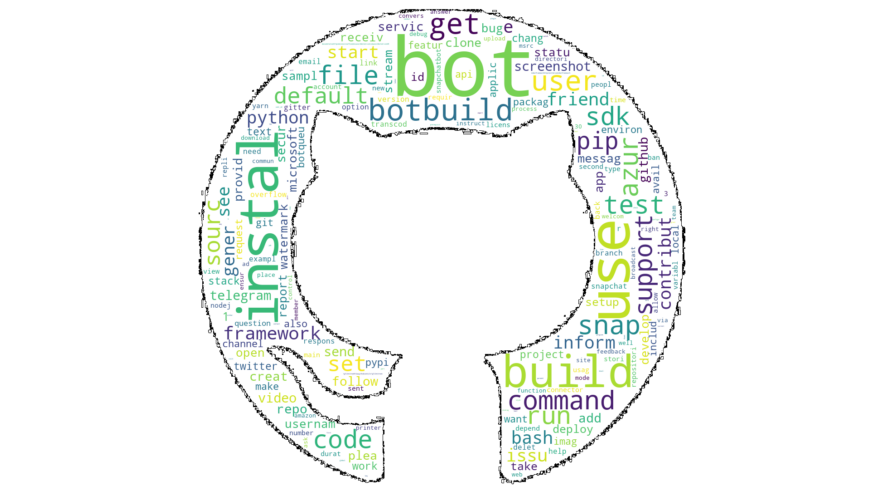

In [464]:
plt.figure(figsize=(16,9))
mask = np.array(Image.open("images/github_logo.png"))
wc = WordCloud(background_color="white", width=800, height=400, contour_width=1, contour_color='black',mask=mask)
    # generate word cloud
wc.generate_from_frequencies(all_words)

    # show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [458]:
def git_logo(text):
    plt.figure(figsize=(16,9))
    mask = np.array(Image.open("images/github_logo.png"))
    wc = WordCloud(background_color="white", width=800, height=400, contour_width=1, contour_color='black',mask=mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

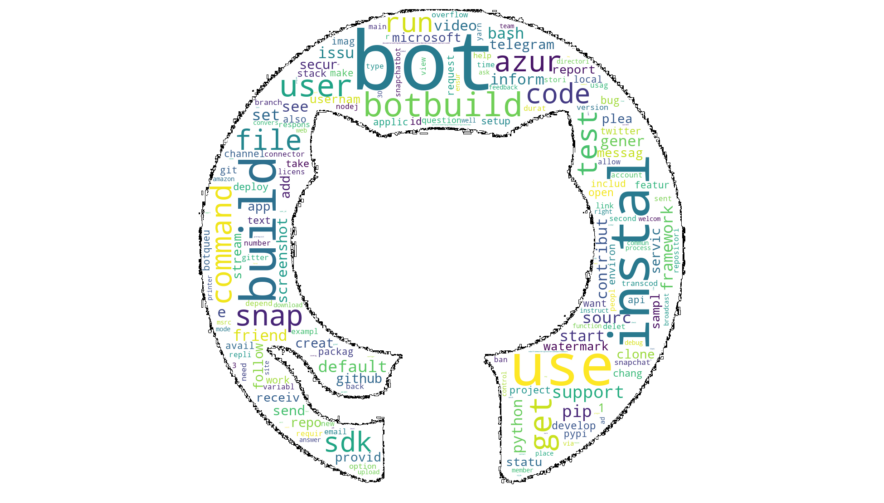

In [459]:
git_logo(all_words)

In [171]:
def c_logo(text):
    plt.figure(figsize=(16,9))
    mask = np.array(Image.open("c_logo.png"))

    wc = WordCloud(background_color="white", colormap = 'coolwarm',width=800, height=400, contour_width=1, contour_color='black',mask=mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc,)
    plt.axis("off")
    plt.show()

In [338]:
def java_logo(text):
    plt.figure(figsize=(16,9))
    mask = np.array(Image.open("java_logo2.png"))

    wc = WordCloud(background_color="white",width=800, height=400, contour_width=2, contour_color='black',mask=mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc,)
    plt.axis("off")
    plt.show()
    #, colormap = 'coolwarm'

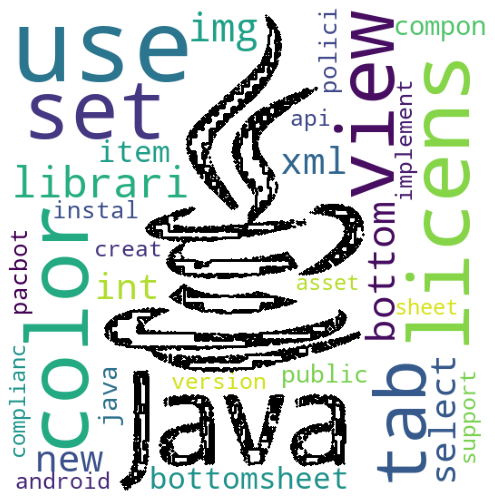

In [339]:
java_logo(java_words.head(30))

In [269]:
def js_logo(text):
    plt.figure(figsize=(16,9))
    mask = np.array(Image.open("js_logo.png"))

    wc = WordCloud(background_color="white", width=800, height=400, contour_width=2, contour_color='black',mask=mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc,)
    plt.axis("off")
    plt.show()

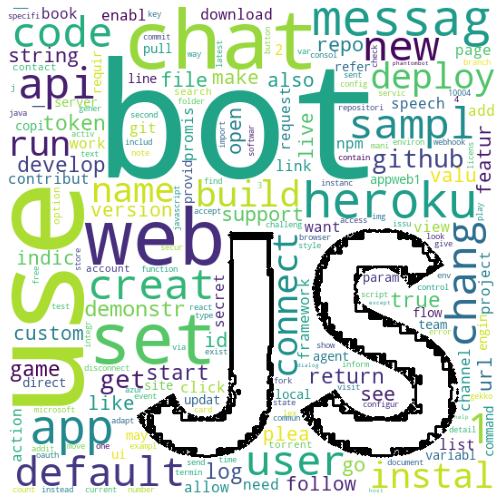

In [270]:
js_logo(javascript_words)

In [331]:
def c_logo(text):
    plt.figure(figsize=(16,9))
    mask = np.array(Image.open("c_logo_in.png"))

    wc = WordCloud(background_color="white", width=800, height=400, contour_width=15, contour_color='black',mask=mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

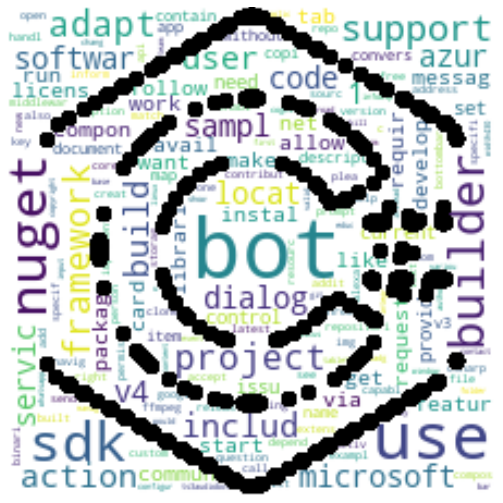

In [332]:
c_logo(c_words)

In [468]:
def python_logo(text):
    plt.figure(figsize=(16,9))
    mask = np.array(Image.open("images/python_inv.png"))
    wc = WordCloud(background_color="white", width=800, height=400, contour_width=1, contour_color='black',mask=mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

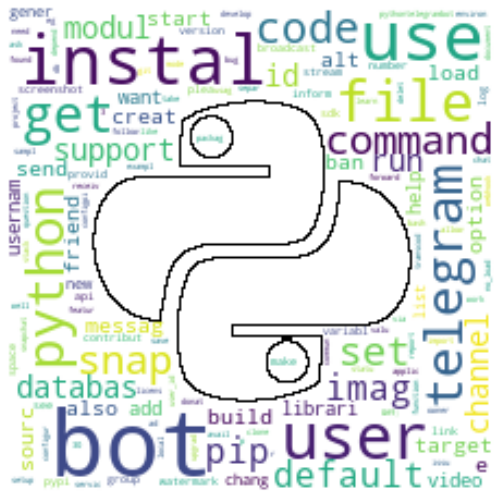

In [469]:
python_logo(word_counts['python_words'])

In [287]:
def ts_logo(text):
    plt.figure(figsize=(16,9))
    mask = np.array(Image.open("image (1).png"))
    wc = WordCloud(background_color="white", width=800, height=400, contour_width=3, contour_color='black',mask=mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

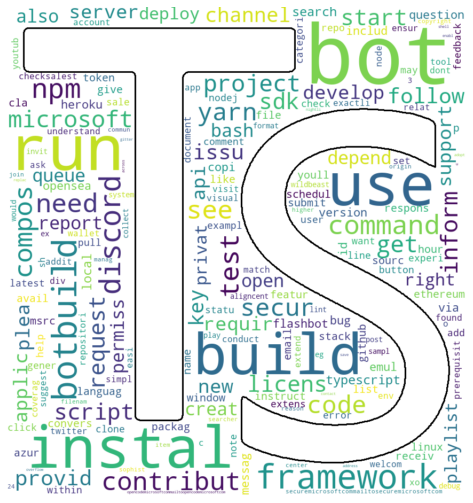

In [288]:
ts_logo(typescript_words)

In [ ]:
# 
# bag of words
#naive based classifier

#### Looking at the first ten repos and pushed into a dataframe


#### likely will need:
    - value counts for language
    - set top value (4-6)
    - bar plot of counts
    - drop nulls
    - filter for english
    - split data (requirement)
#### exploration:
    - lemmatize data ***
    - find common words 
    - explore findings
    
    - Bigrams + word clouds
    - Trigrams + word clouds
    - Takeaways
    
#### modeling:
    - Try various classification modeling 
    - 

In [ ]:
df = prepare.prep_article_data(df)

In [ ]:
df.shape

In [ ]:
train, validate, test = prepare.filter_data(df)

In [ ]:
train.shape

In [ ]:
#def prep_article_data(df, column, extra_words=[], exclude_words=[]):

In [ ]:
# def basic_clean(string):
#     '''
#     This function takes in a string and
#     returns the string normalized.
#     '''
#     string = unicodedata.normalize('NFKD', string)\
#             .encode('ascii', 'ignore')\
#             .decode('utf-8', 'ignore')
#     string = re.sub(r'[^\w\s]', '', string).lower()
#     return string



# def tokenize(string):
#     '''
#     This function takes in a string and
#     returns a tokenized string.
#     '''
#     # Create tokenizer.
#     tokenizer = nltk.tokenize.ToktokTokenizer()
    
#     # Use tokenizer
#     string = tokenizer.tokenize(string, return_str = True)
    
#     return string




# def stem(string):
#     '''
#     This function takes in a string and
#     returns a string with words stemmed.
#     '''
#     # Create porter stemmer.
#     ps = nltk.porter.PorterStemmer()
    
#     # Use the stemmer to stem each word in the list of words we created by using split.
#     stems = [ps.stem(word) for word in string.split()]
    
#     # Join our lists of words into a string again and assign to a variable.
#     string = ' '.join(stems)
    
#     return string




# def lemmatize(string):
#     '''
#     This function takes in string for and
#     returns a string with words lemmatized.
#     '''
#     # Create the lemmatizer.
#     wnl = nltk.stem.WordNetLemmatizer()
    
#     # Use the lemmatizer on each word in the list of words we created by using split.
#     lemmas = [wnl.lemmatize(word) for word in string.split()]
    
#     # Join our list of words into a string again and assign to a variable.
#     string = ' '.join(lemmas)
    
#     return string




# def remove_stopwords(string, extra_words=[], exclude_words=[]):
#     '''
#     This function takes in a string, optional extra_words and exclude_words parameters
#     with default empty lists and returns a string.
#     '''
#     # Create stopword_list.
#     stopword_list = stopwords.words('english')
    
#     # Remove 'exclude_words' from stopword_list to keep these in my text.
#     stopword_list = set(stopword_list) - set(exclude_words)
    
#     # Add in 'extra_words' to stopword_list.
#     stopword_list = stopword_list.union(set(extra_words))

#     # Split words in string.
#     words = string.split()
    
#     # Create a list of words from my string with stopwords removed and assign to variable.
#     filtered_words = [word for word in words if word not in stopword_list]
    
#     # Join words in the list back into strings and assign to a variable.
#     string_without_stopwords = ' '.join(filtered_words)
    
#     return string_without_stopwords



# def prep_article_data(df, column = 'readme_contents', extra_words=[], exclude_words=[]):
#     '''
#     This function take in a df and the string name for a text column with 
#     option to pass lists for extra_words and exclude_words and
#     returns a df with the text article title, original text, stemmed text,
#     lemmatized text, cleaned, tokenized, & lemmatized text with stopwords removed.
#     '''
#     df['clean'] = df[column].apply(basic_clean)\
#                             .apply(tokenize)\
#                             .apply(remove_stopwords, 
#                                 extra_words=extra_words, 
#                                 exclude_words=exclude_words)
    
#     df['stemmed'] = df['clean'].apply(stem)
#     df['lemmatized'] = df['stemmed'].apply(lemmatize)
    
# #     df[column].apply(basic_clean)\
# #                             .apply(tokenize)\
# #                             .apply(stem)\
# #                             .apply(remove_stopwords, 
# #                                 extra_words=extra_words, 
# #                                 exclude_words=exclude_words)
    
# #     df['lemmatized'] = df[column].apply(basic_clean)\
# #                             .apply(tokenize)\
# #                             .apply(lemmatize)\
# #                             .apply(remove_stopwords, 
# #                                 extra_words=extra_words, 
# #                                 exclude_words=exclude_words)
    
#     return df

In [ ]:
# ### ADD TO PREPARE!

# #function to filter out for just english words in readme
# def isEnglish(s):
#     try:
#         s.encode(encoding='utf-8').decode('ascii')
        
#     except UnicodeDecodeError:
#         return False
#     else:
#         return True

In [ ]:
# def is_english(texts):
#      if re.search("[\u4e00-\u9FFF]", texts):
#         return True

In [ ]:
# df =df[df.readme_contents.apply(isEnglish) == True]

In [ ]:
#drops 300 to 153
df.shape

In [ ]:
df.head()

In [ ]:
# Stephanie's function filtered down for functions
df.language.value_counts()

In [ ]:
df.shape

In [ ]:
# need to drop nulls
df.isnull().sum()

In [ ]:
### ADD TO PREPARE

### drops 9

#drop nulls
# df = df.dropna()

In [ ]:
#check
df.isnull().sum()

In [ ]:
# 1 duplicate - remember to check this later when the dataset is expanded
df.readme_contents.duplicated().sum()

In [ ]:
df[df.duplicated(subset=['readme_contents'])]

In [ ]:
df.language.value_counts().head(5).index

In [ ]:
# ### ADD TO PREPARE

# def get_top_5_languages(df):
#     top5_list = list(df.language.value_counts().head(5).index)
#     mask = df.language.apply(lambda x: x in top5_list)
#     df = df[mask]
#     return df

In [ ]:
# df = get_top_5_languages(df)

In [ ]:
df.language.value_counts()

In [ ]:
# #### ADD TO PREPARE


# from sklearn.model_selection import train_test_split
# ####### Splitzzy
# def split_data(df):
#     '''
#     Takes in a dataframe and returns train, validate, and test subset dataframes. 
#     '''
#     train, test = train_test_split(df, test_size = .2, random_state = 123)
#     train, validate = train_test_split(train, test_size = .3, random_state = 123)
#     return train, validate, test